# Tarefa 2 - Produção Energética e Sustentabilidade

### Os Dados
Iremos usar os datasetes <em>energia.csv</em> e <em>meteo.csv</em> dos anos de 2021, 2022 e 2023. 

O dataset de energia contém os seguintes atributos:

- **Data** - o timestamp associado ao registo, ao dia.
- **Hora** - a hora associada ao registo.
- **Normal (kWh)** - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado normal em ciclos bi-horário diários (horas fora de vazio).
- **Horário Económico (kWh)** - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado económico em ciclos bi-horário diários (horas de vazio).
- **Autoconsumo (kWh)** - quantidade de energia eléctrica consumida, em kWh, proveniente dos painéis solares.
- **Injeção na rede (kWh)** - quantidade de energia eléctrica injectada na rede eléctrica, em kWh, proveniente dos painéis solares.

O dataset de meteorologia contém os seguintes atributos:
- **dt** - o timestamp associado ao registo.
- **dt_iso** - a data associada ao registo, ao segundo.
- **city_name** - o local em causa.
- **temp** - temperatura em ºC.
- **feels_like** - sensação térmica em ºC.
- **temp_min** - temperatura mínima sentida em ºC.
- **temp_max** - temperatura máxima sentida em ºC.
- **pressure** - pressão atmosférica sentida em atm.
- **sea_level** - pressão atmosférica sentida ao nível do mar em atm.
- **grnd_level** - pressão atmosférica sentida à altitude local em atm.
- **humidity** - humidade em percentagem.
- **wind_speed** - velocidade do vento em metros por segundo.
- **rain_1h** - valor médio de precipitação.
- **clouds_all** - nível de nebulosidade em percentagem.
- **weather_description** - avaliação qualitativa do estado do tempo.

## Import Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier

## Get the data

In [64]:
#! Não devem usar a extenção do VSCode para alinhar os ficheiros csv 
#! porque isso altera os valores dos atributos com whitesapces!

# Datasets da energia produzida 
energia21 = pd.read_csv('datasets/energia_202109-202112.csv', na_filter=False) # na_filter=False para não assumir 'None' como um valor nulo

energia22 = pd.read_csv('datasets/energia_202201-202212.csv', na_filter=False) # na_filter=False para não assumir 'None' como um valor nulo

energia23 = pd.read_csv('datasets/energia_202301-202304.csv')

energia_treino = pd.concat([energia21, energia22], axis=0)
energia_teste = energia23


# Datasets das condições meteorológicas
meteo21 = pd.read_csv('datasets/meteo_202109-202112.csv')

meteo22 = pd.read_csv('datasets/meteo_202201-202212.csv')

meteo23 = pd.read_csv('datasets/meteo_202301-202304.csv')

meteo_treino = pd.concat([meteo21, meteo22], axis=0)
meteo_teste = meteo23

In [65]:
# energia21.columns
# energia22.columns
# energia23.columns # Não possui o atributo 'Injeção na rede'
print(energia_treino.columns)
print(energia_teste.columns)


# meteo21.columns
# meteo22.columns
# meteo23.columns
print(meteo_treino.columns)
print(meteo_teste.columns)

Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)'],
      dtype='object')
Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)'],
      dtype='object')
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')


In [66]:
# energia21.info()
# energia22.info()
# energia23.info()

# energia_treino.info()
# energia_teste.info()

# meteo21.info() # sea_level e grnd_level não possuem valores (0) | rain_1h só possui alguns valores (537)
# meteo22.info() # sea_level e grnd_level não possuem valores (0) | rain_1h só possui alguns valores (1898)
# meteo23.info() # sea_level e grnd_level não possuem valores (0) | rain_1h só possui alguns valores (206)

# meteo_treino.info()
# meteo_teste.info()

In [67]:
# energia21.head()
# energia22.head()
# energia23.head()

# meteo21.head() 
# meteo22.head()
# meteo23.head()

# Tratamento de dados

## Missing Values

In [68]:
# meteo_treino.isnull().sum()
meteo_teste.isnull().sum()

dt                        0
dt_iso                    0
city_name                 0
temp                      0
feels_like                0
temp_min                  0
temp_max                  0
pressure                  0
sea_level              1752
grnd_level             1752
humidity                  0
wind_speed                0
rain_1h                1546
clouds_all                0
weather_description       0
dtype: int64

<Axes: >

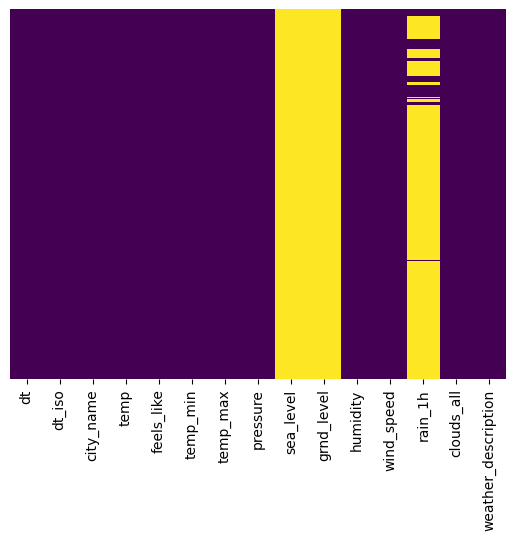

In [69]:
# sns.heatmap(meteo_treino.isnull(), yticklabels=False, cbar=False, cmap='viridis')
sns.heatmap(meteo_teste.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Drop *sea_level* and *grnd_level* do dataset de meteorologia
Iremos dropar estes 2 atributos porque não contém nenhum valor não nulo

In [70]:
meteo_treino.drop(['sea_level'], axis=1, inplace=True)
meteo_treino.drop(['grnd_level'], axis=1, inplace=True)

meteo_teste.drop(['sea_level'], axis=1, inplace=True)
meteo_teste.drop(['grnd_level'], axis=1, inplace=True)

In [71]:
# meteo_treino.head()
# meteo_teste.head()

### Fill with 0 *rain_1h* do dataset de meteorologia

Iremos colocar 0 nos valores nulos de *rain_1h* porque assumimos que não houve precipitação nos casos onde não há valor neste atributo.

In [72]:
# meteo_treino[meteo_treino['rain_1h'].isnull()].info()
# meteo_treino[meteo_treino['rain_1h'] == 0]

meteo_treino.fillna(0, inplace=True)
meteo_teste.fillna(0, inplace=True)


# meteo_treino.info()
meteo_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   1752 non-null   int64  
 1   dt_iso               1752 non-null   object 
 2   city_name            1752 non-null   object 
 3   temp                 1752 non-null   float64
 4   feels_like           1752 non-null   float64
 5   temp_min             1752 non-null   float64
 6   temp_max             1752 non-null   float64
 7   pressure             1752 non-null   int64  
 8   humidity             1752 non-null   int64  
 9   wind_speed           1752 non-null   float64
 10  rain_1h              1752 non-null   float64
 11  clouds_all           1752 non-null   int64  
 12  weather_description  1752 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 178.1+ KB


<Axes: >

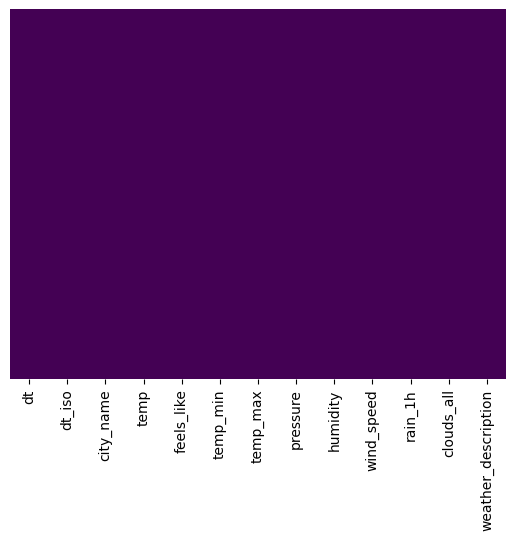

In [73]:
sns.heatmap(meteo_treino.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# sns.heatmap(meteo_teste.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [74]:
meteo_treino.nunique()
# meteo_teste.nunique()

dt                     11688
dt_iso                 11688
city_name                  1
temp                    2423
feels_like              2702
temp_min                 488
temp_max                 550
pressure                  41
humidity                  82
wind_speed               771
rain_1h                  372
clouds_all               101
weather_description        8
dtype: int64

##### Iremos remover a feature *city_name* porque o valor é único em todo o dataset

##### Iremos também remover a feature *dt* porque existe um valor único para cada registo do dataset e a feature *dt_iso* já possui informação sobre a data do registo.

In [75]:
meteo_treino.drop(['city_name'], axis=1, inplace=True)
meteo_teste.drop(['city_name'], axis=1, inplace=True)

meteo_treino.drop(['dt'], axis=1, inplace=True)
meteo_teste.drop(['dt'], axis=1, inplace=True)

In [76]:
# meteo_treino.info()
meteo_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt_iso               1752 non-null   object 
 1   temp                 1752 non-null   float64
 2   feels_like           1752 non-null   float64
 3   temp_min             1752 non-null   float64
 4   temp_max             1752 non-null   float64
 5   pressure             1752 non-null   int64  
 6   humidity             1752 non-null   int64  
 7   wind_speed           1752 non-null   float64
 8   rain_1h              1752 non-null   float64
 9   clouds_all           1752 non-null   int64  
 10  weather_description  1752 non-null   object 
dtypes: float64(6), int64(3), object(2)
memory usage: 150.7+ KB


## Tratamento de Datas (*dt_iso*)

In [77]:
meteo_treino['dt_iso'].head()
meteo_teste['dt_iso'].head()

0    2023-01-01 00:00:00 +0000 UTC
1    2023-01-01 01:00:00 +0000 UTC
2    2023-01-01 02:00:00 +0000 UTC
3    2023-01-01 03:00:00 +0000 UTC
4    2023-01-01 04:00:00 +0000 UTC
Name: dt_iso, dtype: object

In [78]:
meteo_treino['dt_iso'] = pd.to_datetime(meteo_treino['dt_iso'].str.split(" \+").str[0], format = "%Y-%m-%d %H:%M:%S", errors='coerce')
meteo_teste['dt_iso'] = pd.to_datetime(meteo_teste['dt_iso'].str.split(" \+").str[0], format = "%Y-%m-%d %H:%M:%S", errors='coerce')

In [79]:
assert meteo_treino['dt_iso'].isnull().sum() == 0, 'missing record date'
assert meteo_teste['dt_iso'].isnull().sum() == 0, 'missing record date'

In [80]:
meteo_treino['dt_iso'].head()
# meteo_teste['dt_iso'].head()

# meteo_teste.info()

0   2021-09-01 00:00:00
1   2021-09-01 01:00:00
2   2021-09-01 02:00:00
3   2021-09-01 03:00:00
4   2021-09-01 04:00:00
Name: dt_iso, dtype: datetime64[ns]

Renomear o atributo **dt_iso** para **Data** para ficar consistente com o atributo do dataset de energia

In [81]:
meteo_treino.rename(columns={'dt_iso': 'Data'}, inplace=True)
meteo_teste.rename(columns={'dt_iso': 'Data'}, inplace=True)

In [82]:
meteo_treino.head()
# meteo_teste.head()

,Data,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-01 00:00:00,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds
1,2021-09-01 01:00:00,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds
2,2021-09-01 02:00:00,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds
3,2021-09-01 03:00:00,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,2021-09-01 04:00:00,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain


# Tratamento do dataset de energia

In [83]:
energia_treino.info()
energia_teste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horário Económico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injeção na rede (kWh)    11016 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 602.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económico (kW

#### Juntar as features *Data* e *Hora* em apenas um atributo e converter em *Datetime64*

In [84]:
energia_treino['Data'] = energia_treino['Data'] + ' ' + energia_treino['Hora'].astype(str)
energia_teste['Data'] = energia_teste['Data'] + ' ' + energia_teste['Hora'].astype(str)

#### Dropar a feature *Hora*

In [85]:
energia_treino.drop(['Hora'], axis=1, inplace=True)
energia_teste.drop(['Hora'], axis=1, inplace=True)

energia_treino.head()
# energia_teste.head()

,Data,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29 0,0.0,0.0,0.0,None
1,2021-09-29 1,0.0,0.0,0.0,None
2,2021-09-29 2,0.0,0.0,0.0,None
3,2021-09-29 3,0.0,0.0,0.0,None
4,2021-09-29 4,0.0,0.0,0.0,None


##### Converter a *string* para *datetime*

In [86]:
energia_treino['Data'] = pd.to_datetime(energia_treino['Data'], format = "%Y-%m-%d %H", errors='coerce')
energia_teste['Data'] = pd.to_datetime(energia_teste['Data'], format = "%Y-%m-%d %H", errors='coerce')

In [87]:
assert energia_treino['Data'].isnull().sum() == 0, 'missing record date'
assert energia_teste['Data'].isnull().sum() == 0, 'missing record date'

In [88]:
energia_treino.info()
energia_teste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     11016 non-null  datetime64[ns]
 1   Normal (kWh)             11016 non-null  float64       
 2   Horário Económico (kWh)  11016 non-null  float64       
 3   Autoconsumo (kWh)        11016 non-null  float64       
 4   Injeção na rede (kWh)    11016 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 516.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Normal (kWh)             2256 non-null   float64       
 2   Horário Económico (kWh)  2256 non-null   fl

In [89]:
energia_treino.head()
# energia_teste.head()

,Data,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29 00:00:00,0.0,0.0,0.0,None
1,2021-09-29 01:00:00,0.0,0.0,0.0,None
2,2021-09-29 02:00:00,0.0,0.0,0.0,None
3,2021-09-29 03:00:00,0.0,0.0,0.0,None
4,2021-09-29 04:00:00,0.0,0.0,0.0,None


## Merging the datasets

In [90]:
# energia_treino.head()
# meteo_treino.head()


#! Experimentar com outros tipos de merge
data_treino = pd.merge(energia_treino, meteo_treino, on='Data', how='left')
data_teste = pd.merge(energia_teste, meteo_teste, on='Data', how='left')

In [100]:
# data_treino.head()
data_teste.head()

# data_treino.info()
# data_teste.info()

,Data,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2023-01-01 00:00:00,0.0,0.467,0.0,12.93,12.76,12.72,13.43,1019.0,95.0,2.02,3.72,100.0,moderate rain
1,2023-01-01 01:00:00,0.0,0.577,0.0,13.49,13.38,13.43,13.90,1018.0,95.0,2.18,3.26,100.0,moderate rain
2,2023-01-01 02:00:00,0.0,0.346,0.0,13.55,13.44,13.48,14.82,1017.0,95.0,2.88,2.44,100.0,moderate rain
3,2023-01-01 03:00:00,0.0,0.270,0.0,13.61,13.51,12.01,14.82,1016.0,95.0,3.63,1.74,100.0,moderate rain
4,2023-01-01 04:00:00,0.0,0.252,0.0,13.59,13.49,12.01,14.82,1015.0,95.0,4.58,1.13,100.0,moderate rain


Iremos encher de 0 os atributos que têm valores nulos no *data_teste* (Ver melhor se devemos fazer isto)

In [665]:
data_teste['weather_description'].fillna('sky is clear', inplace=True)
data_teste.fillna(0, inplace=True)

In [666]:
data_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Normal (kWh)             2256 non-null   float64       
 2   Horário Económico (kWh)  2256 non-null   float64       
 3   Autoconsumo (kWh)        2256 non-null   float64       
 4   temp                     2256 non-null   float64       
 5   feels_like               2256 non-null   float64       
 6   temp_min                 2256 non-null   float64       
 7   temp_max                 2256 non-null   float64       
 8   pressure                 2256 non-null   float64       
 9   humidity                 2256 non-null   float64       
 10  wind_speed               2256 non-null   float64       
 11  rain_1h                  2256 non-null   float64       
 12  clouds_all               2256 non-

# Treinar o Modelo

## 1. Árvore de decisão

In [667]:
data_treino['Data'] = data_treino['Data'].dt.strftime("%Y-%m-%d %H:%M:%S")
data_teste['Data'] = data_teste['Data'].dt.strftime("%Y-%m-%d %H:%M:%S")

data_treino.drop(['Data'], axis=1, inplace=True)
data_teste.drop(['Data'], axis=1, inplace=True)


data_treino = pd.get_dummies(data_treino, columns=['weather_description'])
data_teste = pd.get_dummies(data_teste, columns=['weather_description'])

In [668]:
x_treino = data_treino.drop(['Injeção na rede (kWh)'], axis=1)
y_treino = data_treino['Injeção na rede (kWh)'].to_frame()


# x_treino.info()
# y_treino.info()

In [669]:
x_teste = data_teste
x_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Normal (kWh)                              2256 non-null   float64
 1   Horário Económico (kWh)                   2256 non-null   float64
 2   Autoconsumo (kWh)                         2256 non-null   float64
 3   temp                                      2256 non-null   float64
 4   feels_like                                2256 non-null   float64
 5   temp_min                                  2256 non-null   float64
 6   temp_max                                  2256 non-null   float64
 7   pressure                                  2256 non-null   float64
 8   humidity                                  2256 non-null   float64
 9   wind_speed                                2256 non-null   float64
 10  rain_1h                             

#### Decision Tree 

In [670]:
dtc = DecisionTreeClassifier(random_state=2023)

dtc.fit(x_treino, y_treino)

prediction = dtc.predict(x_teste)

In [675]:
with open('results.csv', 'w') as results:
    results.write('RowId,Result\n')
    i = 0
    for p in prediction:
        results.write(f'{i},{p}\n')
        i+=1


We need to create a dictionary assigning the string to a numeric value:

None - 0, Low - 1, Medium - 2, High - 3, Very_High - 4

We can create a replacement map in other way:

Now we need to replace with the new values:

Done! Now we can see that the type of values are <em>int64</em>:

#### b) Label encoding

Similar to the previous examples, each string will be assigned a number. Instead of replacing the values under the column <em>incidents</em>, we are going to create a new colum to each created label.

To complete the process, it is needed to replicate for each label and then drop the column <em>incidents</em>.

Let's see another way to label encoding. This uses the <em>LabelEncoder</em> from <em>sklearn</em>.

It creates a new column, <em>incidents_code</em>, with the labels assigned to feature <em>incidents</em>. The numeric values were assigned randomly, being the crescent order not apllicable to the meaning of the qualifying words.

#### c) One-Hot encoding

This alternative uses <em>LabelBinarizer</em> of <em>sklearn</em> and creates a matrix with bits regarding each label.

#### d) Binary Encoding
Similar to the previous technique, it creates a matrix of the status of the values, but this time with binary values. See the comparison between techniques below:

|   Level   | "Decimal encoding" | Binary encoding | One-Hot encoding |
| :-------: | :----------------: | :-------------: | :--------------: |
| None      |         0          |       000       |      000001      |
| Low       |         1          |       001       |      000010      |
| Medium    |         2          |       010       |      000100      |
| High      |         3          |       011       |      001000      |
| Very_High |         4          |       100       |      010000      |

For this technique it is needed to have the <em>category_encoders</em> installed:
<code>!pip install category_encoders</code>

#### e) Backward difference encoding
The values are normalized in the range of -1 to 1.

#### f) Factorize
This technique encodes the object as an enumerated type or categorical variable.

We will choose the factorize technique to keep going.

Other option would it be to filter the <em>NaN</em> values when reading the CSV file:

<code>data = pd.read_csv('incidents.csv', na_filter=False)</code>

Regarding the features <em>magnitude_delay</em>, <em>luminosity</em> and <em>avg_rain</em>, we will factorize for now.

## 3. Handling dates

Datetime Properties and Methods (https://pandas.pydata.org/pandas-docs/version/0.23/api.html#datetimelike-properties)

We are going to convert the dates from <em>object</em> to <em>datetime</em>, specifying the format we want:

We can extract parts of the date and create new columns with that:

Since the year and the minute have only one value, we will drop it.

Other functions to deal with dates

We can use <em>datetime.today</em> and fetch the actual date.

It can be measured the time elapsed between the dates on the dataset and today.

And we can also separate each component of the date by day, month, hour, time, etc.

Now we need to choose how to deal with the <em>record_date</em>.

There are other features that need to be worked on, but it's up to you now!

# Exploratory Data Analysis

Time to put your data viz skills to the test! Try to recreate the following plots, make sure to import the libraries you'll need!

Let's analyze through a heatmap

We can see that there is a relation between 
- <em>magnitude_of_delay</em> and <em>delay_in_seconds</em>
- <em>magnitude_of_delay</em> and <em>record_date</em>
- <em>avg_humidity</em> and <em>luminosity<em>

Let's see with a pairplot

It's hard to analyze the relation of all features. Let's create jointplots between the features with notice a relationship.

Jointplot of <em>Magnitude_of_delay vs. Delay_in_seconds</em>

Jointplot <em>Luminosity vs. Avg_temperature</em>

Jointplot <em>Avg_humidity vs. Delay_in_seconds</em>

Jointplot <em>Avg_temperature vs. Avg_humidity</em>

It seems there are a relation between <em>Avg_temperature</em> and <em>Avg_humidity</em>. Let´s create a lmplot <em>Avg_temperature vs. Avg_humidity</em>